# Interpolating Polynomials

___

In [5]:
! pip install numpy matplotlib --quiet

In [6]:
import numpy as np
from matplotlib import pyplot as plt

___

### The Lagrangian Form of $P_2$

Given the data points in the table below, we can use the lagrangian form to get a second-degree polynomial which we can use to estimate our unknown function, $f$.

| $x_{j}$ | $f(x_{j})$  |
|---------|-------------|
|   $0$  | $1$    |
|   $1$  | $1$    |
|   $3$  | $-5$ |

The Lagrangian form of $P_{2}$ is written as
$$p_{2}(x) = l_{0}(x)f(x_{0}) + l_{1}(x)f(x_{1}) + l_{2}(x)f(x_{2})$$
Where $l_{j}(x)$ is defined as  
$$l_{j} =\prod^{n}_{k=0, k\neq j} \frac{x-x_{k}}{x_{j}-x_{k}}$$

Thus we have $p_{2}$:
$$p_{2}(x)= -x^{2}+x+1$$ is the interpolating polynomial.

#### Using $P_{2}$ to approximate $f(2)$

Plugging in $2$ into our polynomial $P_2$ from above gives:
$$f(2)\approx p_{2}(2) = -(2)^2 + 2 +1 = -4 + 3 = -1 \implies f(2)\approx -1$$

Which we can visualize in the graph below for our given data, and test point at $x=2$.

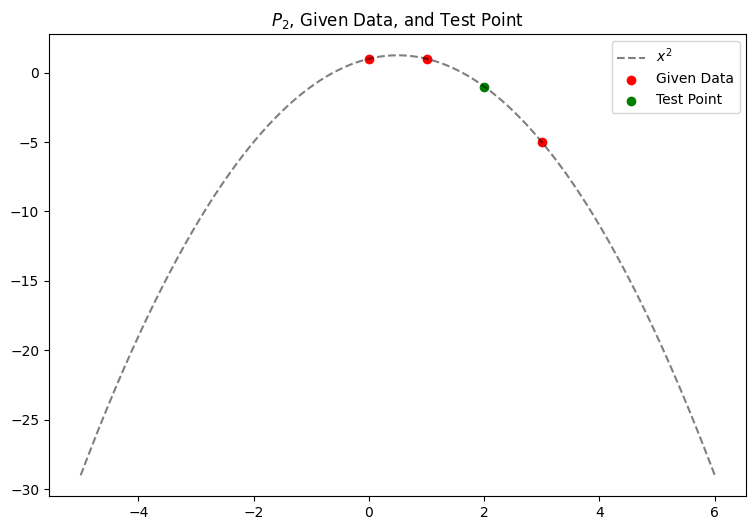

In [12]:
x = np.linspace(-5,6, 1000)
points = [(0,1),(1,1),(3, -5)]

p_2 = lambda x: -(x**2) + x + 1

fig, ax = plt.subplots(figsize = (9, 6))

ax.plot(x, p_2(x), color = "black", alpha = .5, linestyle="--", label="$x^2$")
ax.scatter(*zip(*points), color = "red", label="Given Data")
ax.scatter(2,p_2(2), color = "green", label="Test Point")
ax.legend()
ax.set_title("$P_{2}$, Given Data, and Test Point");

___

### Lebesgue Interpolation
We can prove that

$$
\begin{equation}
{\lVert f - p_{n}\rVert}_{\infty} \leq (1 + \Lambda_{n}){\lVert f - p^{*}_{n}\rVert}_{\infty}
\end{equation}
$$

where $p_{n}$ is the interpolating polynomial of $f$ at the nodes $x_{0}, \dots, x_{n}, p^{*}_{n}$ is the best approximation of $f$, in the supremum (infinity) norm, by a polynomial of at most $n$, and $\Lambda_{n}$ is the Lebesgue constant, i.e. $\Lambda_{n} = {\lVert L_{n}\rVert}_{\infty}$, where

$$
\begin{equation}
L_{n}(x) = \sum^{n}_{j=0}\lvert l_{j}(x)\rvert
\end{equation}
$$

Of which we can write some python to evaluate the Lebesgue function (2) associated to a given set of pairwise distinct nodes $x_{0},\dots , x_{n}$.

In [13]:
def equidist_x(n): 
    return np.array([-1 + k*(2/n) for k in range(n+1)])
def cheby_x(n):
    return np.array([np.cos((k*np.pi)/n) for k in range(n+1)])

def LagrangeCoeff(X, j):
    # Gets jth element
    x_j = X[j]
    # Removes the jth element so we can use vectorize operations
    X = np.delete(X,j)
    # Returns a function to be evaluated at the function value
    return lambda x: (np.prod(x - X))/(np.prod(x_j-X))

def LebesgueFunction(X, vectorized = True):
    # Creates all of the l_js
    LAGCoeffs = np.array([LagrangeCoeff(X, i) for i in range(len(X))])
    LebFunc = lambda x: np.sum([np.abs(LAG(x)) for LAG in LAGCoeffs])

    if vectorized:
        return lambda X: np.array([LebFunc(x) for x in X])
    else:
        return LebFunc

def plotL_n(x_j, L_n, ax = None):
    
    if ax is None: 
        fig, ax = plt.subplots(figsize = (6,4))
        
    n_e = 1000
    n = str(len(x_j)-1)
    x_points = equidist_x(n_e)
    y_points = L_n(x_points)
    max_Lambda = np.max(y_points)
    Title = "Max $\Lambda_{" + str(n) + "}=" + str(max_Lambda) + "$"
    ax.plot(x_points, y_points, label = "$L_{"+str(n) + "}$")
    ax.hlines(y = max_Lambda, xmin = -1,xmax = 1, 
              linestyle = "--", alpha = .5, label="$|| L_{"+str(n) + "}||_{\infty}$")
    ax.legend()
    ax.set_title(Title)
    return (ax, max_Lambda)

If we consider the equidistributed points $x_{j} = -1 + j(2/n)$ for $j = 0,\dots,n$. We can plot $L_{n}(x)$ (evaluate $L_{n}(x)$ at a large number of points $\bar{x}_{k}$ to have a good plotting resolution, e.g. $\bar{x}_{k} = -1 + k(2/n_{e}), k = 0, \dots, n_{e}$ with $n_{e} = 1000$) for $n = 4, 10, \text{ and } 20$. And then estimate $\Lambda_{n}$ for these three values of $n$.

The max for n = 4 is 2.207824277504
The max for n = 10 is 29.898141093562177
The max for n = 20 is 10979.243923985841


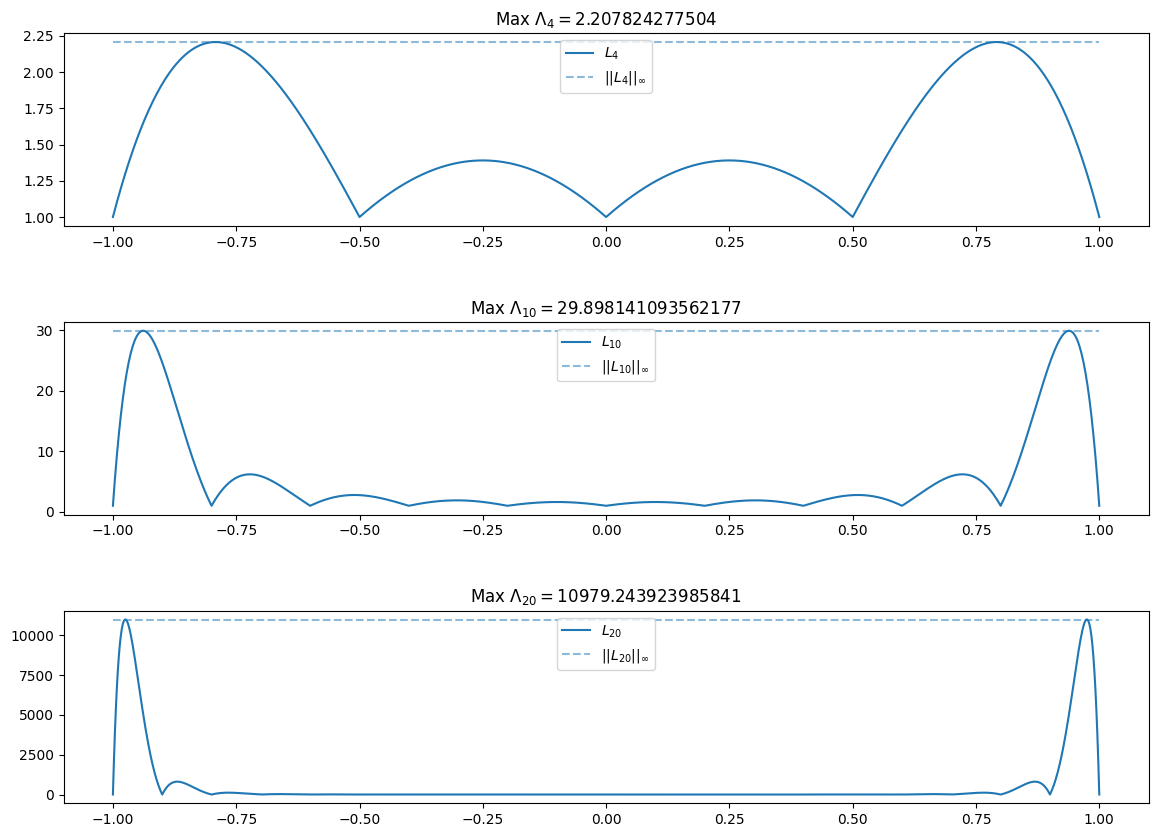

In [15]:
N = [4, 10,20]

fig, ax = plt.subplots(len(N), figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = equidist_x(n)
    L_n = LebesgueFunction(x_j)
    ax[i], max_l = plotL_n(x_j, L_n, ax[i])
    print("The max for n = " + str(n) +" is "+ str(max_l))

Where we see that for the equidistant nodes above, that the Lebesgue constant is being defined by the behavior at the edges of our range.

#### Lebesgue Interpolation with Chebysheve Nodes
If we instead repeat the above for the Chebyshev nodes $x_{j} = \cos\left(\frac{j\pi}{n}\right), j = 0,\dots, n$. We can see different behavior of $L_{n}(x)$ and $\Lambda_{n}$ with those corresponding to the equidistributed points.

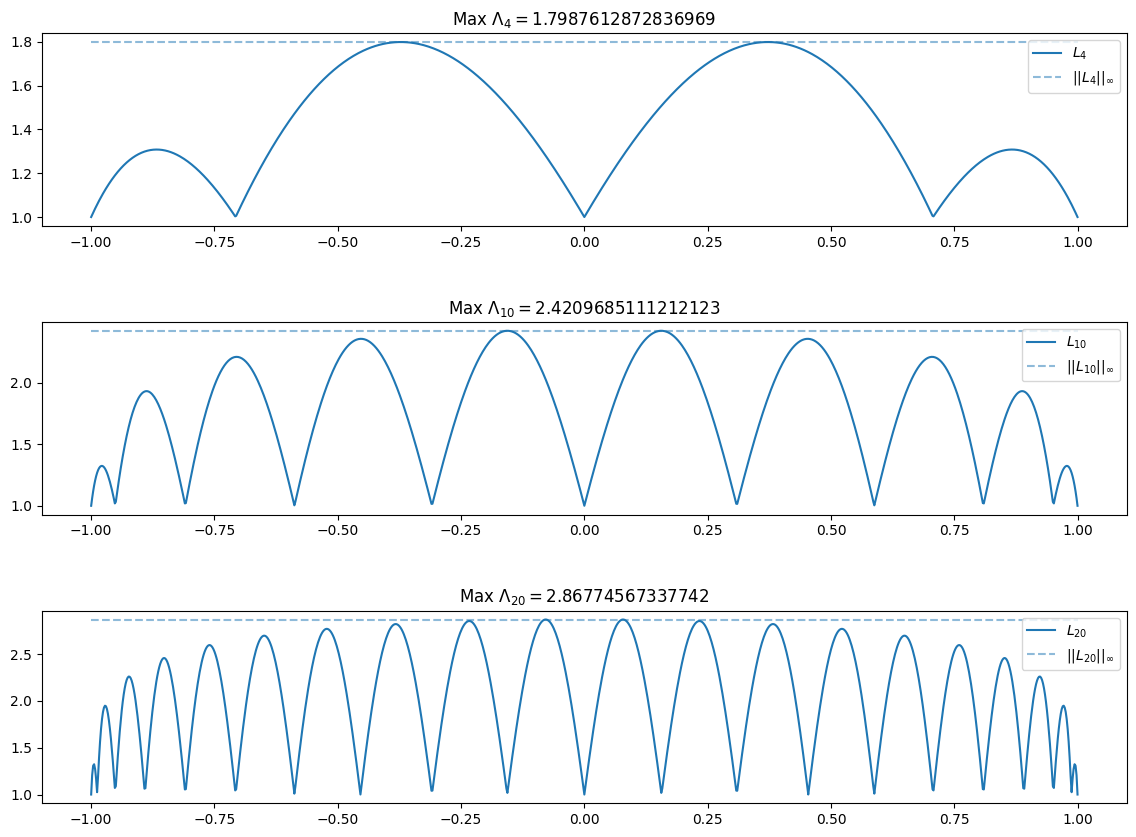

In [16]:
N = [4,10,20]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = cheby_x(n)
    L_n = LebesgueFunction(x_j)
    plotL_n(x_j, L_n, ax[i])

As can be seen above, the Chebyshev nodes seem to obtain their max close to zero as n increases, however, with the equidistant nodes, the max seems to be acheived closer to the bounds of the interval, namely near $-1$ or $1$. Additionally $\Lambda_{n}$ tends to grow much faster with the equidistant nodes, where with the Chebyshev nodes, it grows much slower.

___

### Interpolating Arbitrarily distributed Nodes

We can use the Barycentric Formula for evaluating the interpolating polynomial for abritrarily distributed nodes $x_{0}, \dots,x_{n}$

In [23]:
def BaryWeights(X):
    n = len(X)
    l = np.empty(n)
    for k in range(n):
        l[k] = 1 / np.prod(X[k] - X[np.arange(n) != k])
    return l

def BaryFormula(X, F_x, l=None , vectorized = True):
    n = len(X)
    N = len(x)
    l = BaryWeights(X) if l is None else l
    
    def BaryFunc(x):
        p = 0
        # Compute quotient of weighted sums
        z = x - X
        j = np.count_nonzero(z == 0)
        if j != 0:
            p = F_x[z == 0]
        else:
            mu = l / z
            p = np.sum(mu * F_x) / np.sum(mu)
        return p
    
    if vectorized:
        return lambda points: np.array([BaryFunc(x) for x in points], dtype='object')
    else:
        return BaryFunc   

Here we test it with just a regular degree 3 polynomial!

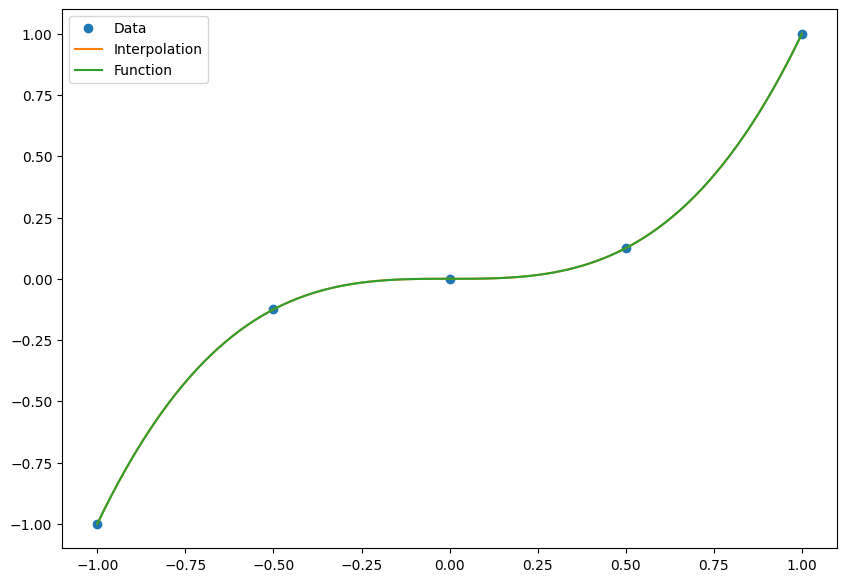

In [24]:
nodes = np.linspace(-1, 1, 5)
data = nodes**3
points = np.linspace(-1, 1, 100)
p = BaryFormula(nodes, data)

fig, ax = plt.subplots(figsize = (10,7))

ax.plot(nodes, data, 'o', label='Data')
ax.plot(points, p(points), '-', label='Interpolation')
ax.plot(points, points**3, '-', label='Function')
ax.legend();

Consider the following table of data

| $x_{j}$ | $f(x_{j})$  |
|---------|-------------|
|   $0.00$  | $0.0000$    |
|   $0.25$  | $0.7070$    |
|   $0.52$  | $1.0000$    |
|   $0.74$  | $0.7071$    |
|   $1.28$  | $-0.7074$    |
|   $1.50$  | $-1.0000$    |

Here we show what the function looks like from our interpolation!

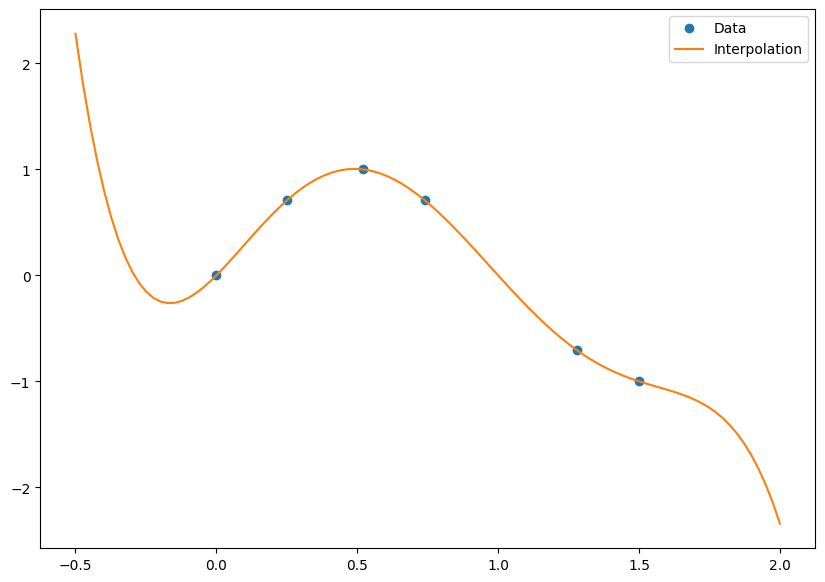

In [26]:
nodes = np.array([0,.25,.52,.74,1.28,1.50])
data = np.array([0,0.7070,1,0.7071,-0.7074,-1.0])
points = np.linspace(-.5, 2, 100)

p = BaryFormula(nodes, data)

fig, ax = plt.subplots(figsize = (10,7))

ax.plot(nodes, data, 'o', label='Data')
ax.plot(points, p(points), '-', label='Interpolation')
ax.legend();

And the $P_{5}$ interpolation of $f(2)$ is

In [27]:
(BaryFormula(nodes, data, vectorized = False))(2)

-2.343829608172828

___

### The Runge Example
Let 

$$
\begin{equation}
f(x) = \frac{1}{1+25x^{2}} \text{ with } x\in [-1,1]
\end{equation}
$$

And lets interpolate with both: 

(a) The equidistributed nodes $x_{j} = -1 + j(2/n), j = 0,\dots, n$ for $n = 4,8,\text{ and } 12$.

(b) The Chebyshev nodes $x_{j} = \cos\left(\frac{j\pi}{n}\right), j = 0, \dots, n$ for $n = 4,8,12,\text{ and } 100$.

Where we use the barycentric weights for the equidistributed nodes
$$
\begin{equation}
\lambda_{j} = {\left(-1\right)}^{j} {n\choose j} \text{ for } j = 0,\dots, n
\end{equation}
$$
and for the Chebyshev nodes we can use
$$
\begin{equation}
\lambda_{j} = \begin{cases}
    \frac{1}{2}\left(-1\right)^{j} & \text{for } j = 0 \text{ or } j = n \\
    \left(-1\right)^{j} & \text{for } j = 1,\dots, n-1
\end{cases}
\end{equation}
$$

In [28]:
def plotB_n(x_j, B_n, f_x, ax = None):
    
    if ax is None: 
        fig, ax = plt.subplots(figsize = (6,4))
        
    n_e = 1000
    n = str(len(x_j)-1)
    x_points = equidist_x(n_e)
    y_points = B_n(x_points)
    max_Lambda = np.max(y_points)
    Title = "Barycentric Interpolation with $" + str(n) + "$ nodes"
    ax.plot(x_points, y_points, label = "Interpolation")
    ax.plot(x_points, f_x(x_points), label = "Data")
    ax.legend()
    ax.set_title(Title)
    return ax

In [29]:
f_x = lambda x: 1/(1+25*(x**2))

In [30]:
def EquidistantBaryWeights(X):
    from scipy.special import comb
    n = len(X)
    return np.array([((-1)**j)*comb(n-1, j) for j in range(n)])

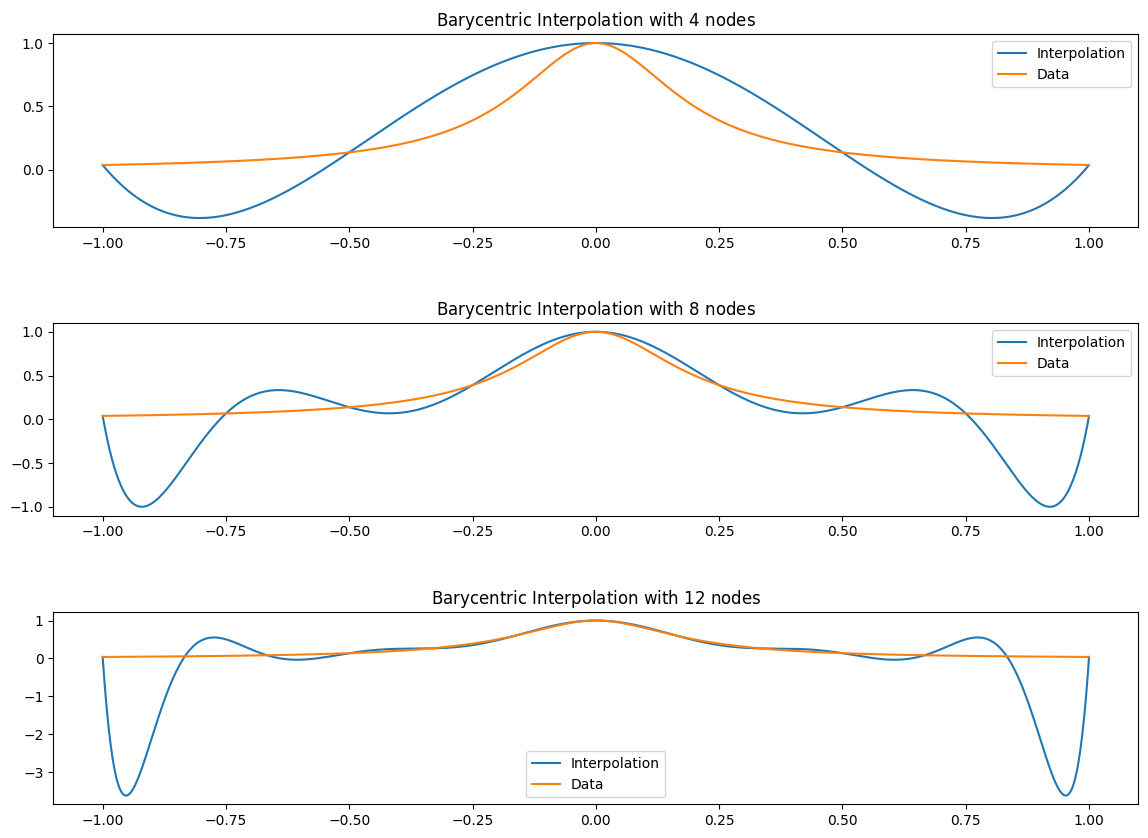

In [31]:
N = [4,8,12]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = equidist_x(n)
    f_x_j = f_x(x_j)
    l = EquidistantBaryWeights(x_j)
    B_n = BaryFormula(x_j, f_x_j, l = l)
    plotB_n(x_j, B_n, f_x, ax[i])

#### Chebyshev Nodes

The Chebyshev nodes $x_{j} = \cos\left(\frac{j\pi}{n}\right), j = 0, \dots, n$ for $n = 4,8,12,\text{ and } 100$.

In [32]:
def ChebyBaryWeights(X):
    n = len(X)
    l = np.array([float((-1)**j) for j in range(n)])
    l[0] = l[0]/2
    l[-1] = l[-1]/2
    return l

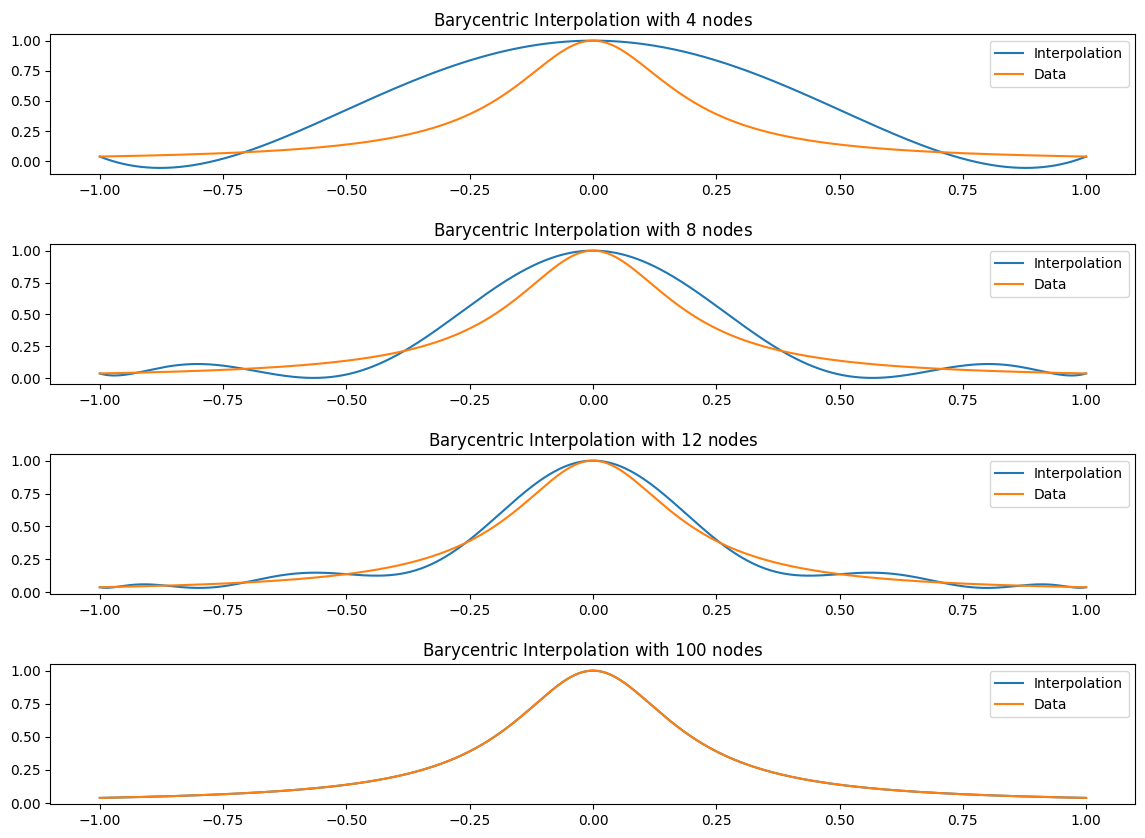

In [33]:
N = [4,8,12, 100]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = cheby_x(n)
    f_x_j = f_x(x_j)
    l = ChebyBaryWeights(x_j)
    B_n = BaryFormula(x_j, f_x_j, l = l)
    plotB_n(x_j, B_n, f_x, ax[i])

#### Error analysis
Plotting the error $e_{n} = f-p_{n}$ for (a) and (b)

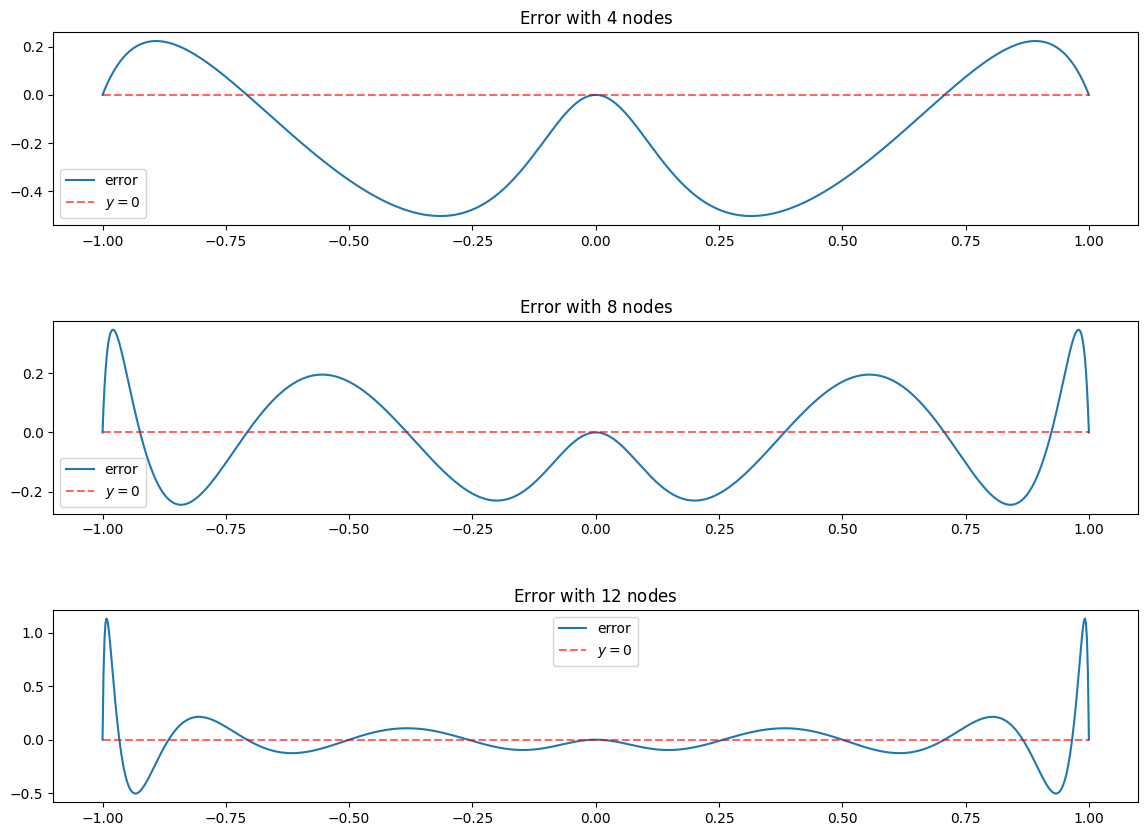

In [34]:
e_n = lambda x, f_x, B_n: f_x(x)-B_n(x)

N = [4,8,12]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = cheby_x(n)
    f_x_j = f_x(x_j)
    l = EquidistantBaryWeights(x_j)
    n_e = 1000
    x_points = equidist_x(n_e)
    B_n = BaryFormula(x_j, f_x_j, l = l, vectorized=True)
    ax[i].plot(x_points, e_n(x_points, f_x, B_n), label = "error")
    ax[i].set_title("Error with $" + str(n) + "$ nodes")
    ax[i].hlines(0, -1,1,linestyle = "--", alpha = 0.6, color = "red", label = "$y=0$")
    ax[i].legend()

In the above graphs you see that the error is very small around $x=0$ which is what we would expect as seen in the graph above, the equidistant nodes tend to be very close to the function using Barycentric interpolation.

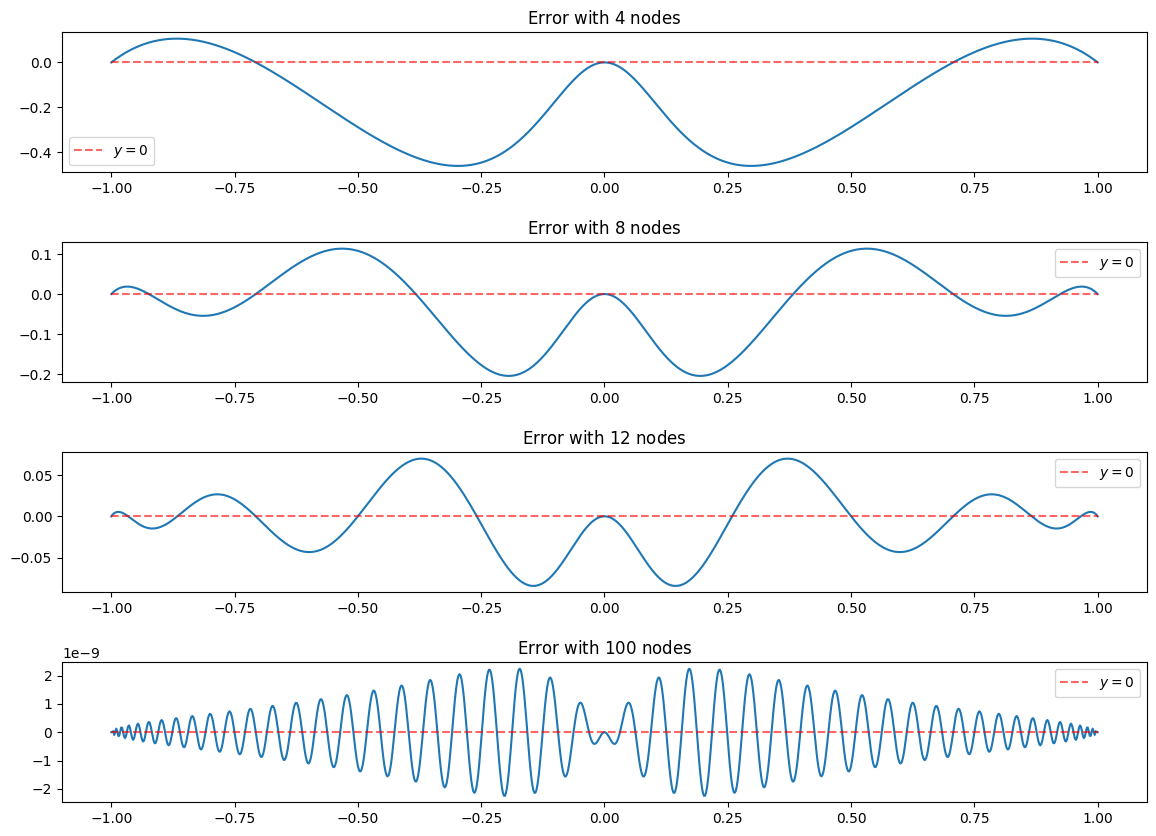

In [35]:
e_n = lambda x, f_x, B_n: f_x(x)-B_n(x)

N = [4,8,12, 100]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = cheby_x(n)
    f_x_j = f_x(x_j)
    l = ChebyBaryWeights(x_j)
    n_e = 1000
    x_points = equidist_x(n_e)
    B_n = BaryFormula(x_j, f_x_j, l = l, vectorized=True)
    ax[i].plot(x_points, e_n(x_points, f_x, B_n))
    ax[i].set_title("Error with $" + str(n) + "$ nodes")
    ax[i].hlines(0, -1,1,linestyle = "--", alpha = 0.6, color = "red", label = "$y=0$")
    ax[i].legend()

In the above graphs you see that the error is very small around $x=-1,0,1$ which is what we would expect as seen in the graphs above, the chebyshev nodes tend to be very close to the function using Barycentric interpolation on the edges and the origin, however they tend to be farther in between the origin and the edges.

#### Another Test
For $f(x) = e^{x^{2}}$ for $x\in \left[-1, 1\right]$ 

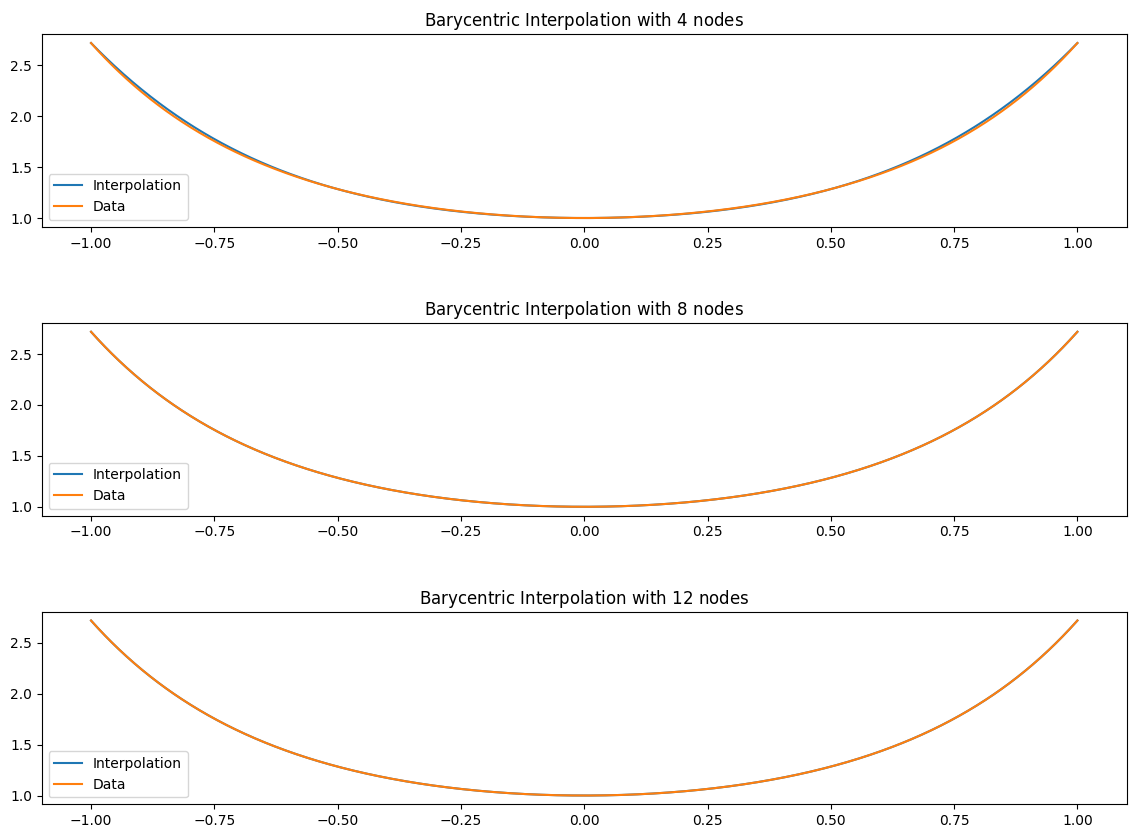

In [36]:
f_x = lambda x: (np.e)**(x**2)
N = [4,8,12]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = equidist_x(n)
    f_x_j = f_x(x_j)
    l = EquidistantBaryWeights(x_j)
    B_n = BaryFormula(x_j, f_x_j, l = l)
    plotB_n(x_j, B_n, f_x, ax[i])

Here we can see that the equidistant nodes tend to be a very good approximation for the function. Even at $4$ nodes, the function seems to be very close, and even the error looks to be very small. As $n$ increases, we see it match the function pretty much perfectly. Below I will also plot the error which will reveal that the error is very small on this interval.

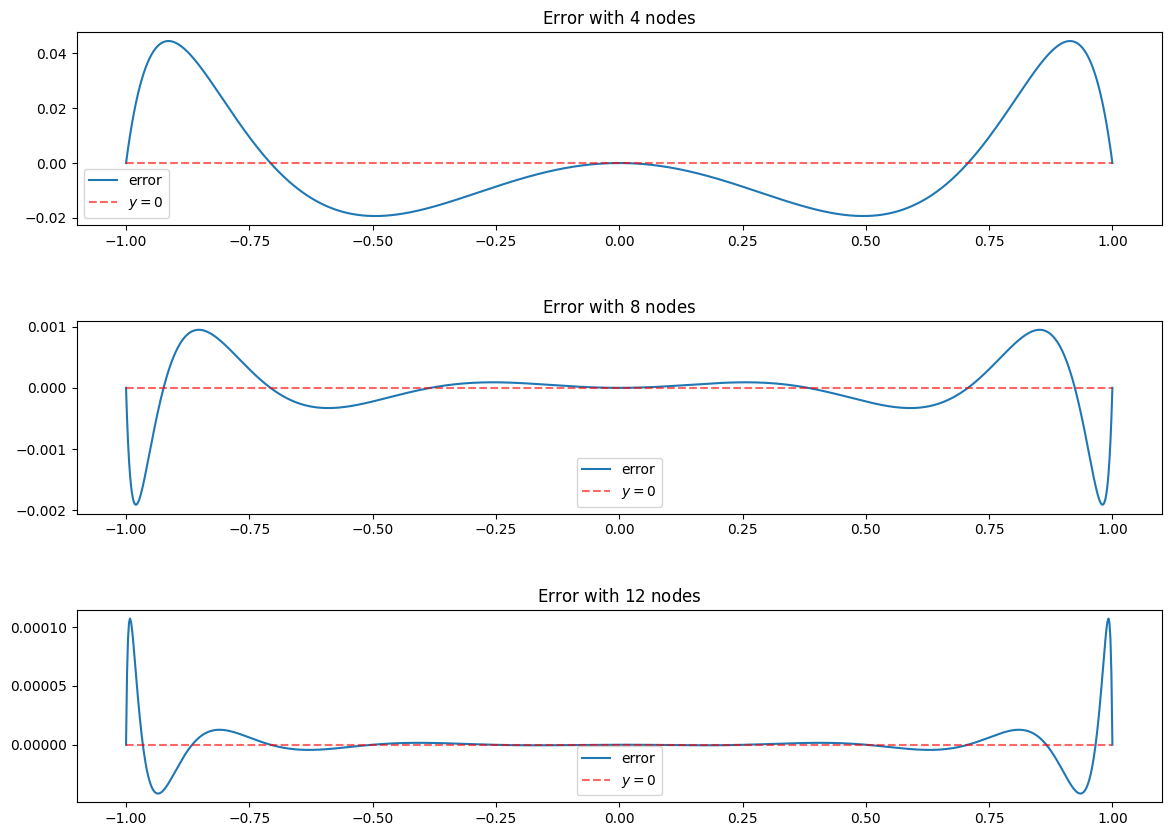

In [37]:
e_n = lambda x, f_x, B_n: f_x(x)-B_n(x)

N = [4,8,12]

fig, ax = plt.subplots(len(N),figsize = (14,10))
fig.subplots_adjust(hspace=.5)

for i, n in enumerate(N):
    x_j = cheby_x(n)
    f_x_j = f_x(x_j)
    l = EquidistantBaryWeights(x_j)
    n_e = 1000
    x_points = equidist_x(n_e)
    B_n = BaryFormula(x_j, f_x_j, l = l, vectorized=True)
    ax[i].plot(x_points, e_n(x_points, f_x, B_n), label = "error")
    ax[i].set_title("Error with $" + str(n) + "$ nodes")
    ax[i].hlines(0, -1,1,linestyle = "--", alpha = 0.6, color = "red", label = "$y=0$")
    ax[i].legend()

As seen above, the max error at $12$ nodes is about $0.000010$, that is very good for the low computation cost it took.